In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


# Data exploration

In [2]:
# read data
fraud_df = pd.read_csv("fraud_analyst_interview_exercise_-_v2.csv")

In [3]:
fraud_df.head()

,fraud_flag,payment_id,hashed_ip,device,version,adjusted_pmt_created_at,merchant_name,hashed_consumer_id,adjusted_acc_created_at,amount,...,hashed_consumer_email,consumer_email_domain,hashed_buyer_phone,hashed_consumer_phone,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_gender,consumer_age
0,0.0,5860,ip_3737,Android,10.0,2021-04-26 0:00:03,Red Shop,consumer_1145,2021-03-25 23:15:19,47500,...,email_6799,gmail.com,phone_7698,phone_7698,139,358,32500,7508146,NaN,65
1,0.0,2676,ip_1723,Android,10.0,2021-04-26 0:01:33,Red Shop,consumer_2022,2021-04-18 3:23:20,580,...,email_192,gmail.com,phone_3244,phone_3244,108,19,3800,8518137,Female,66
2,0.0,8153,ip_5156,Android,9.0,2021-04-26 0:04:28,Red Shop,consumer_837,2021-03-09 23:46:45,680,...,email_4991,docomo.ne.jp,phone_1389,phone_1389,112,0,0,9552346,Male,49
3,0.0,8147,ip_5156,Android,9.0,2021-04-26 0:05:20,Red Shop,consumer_837,2021-03-09 23:46:45,680,...,email_4991,docomo.ne.jp,phone_1389,phone_1389,197,0,0,9552346,NaN,57
4,0.0,1344,ip_865,iPhone OS,13.0,2021-04-26 0:05:48,Blue Shop,consumer_2336,2021-04-20 19:37:42,125400,...,email_8182,ezweb.ne.jp,phone_3618,phone_3618,13,0,0,9959594,Male,21


In [4]:
# fraud_df.describe()
fraud_df.isna().sum()

fraud_flag                 11048
payment_id                     0
hashed_ip                      0
device                        87
version                       87
adjusted_pmt_created_at        0
merchant_name                  0
hashed_consumer_id             0
adjusted_acc_created_at        0
amount                         0
hashed_buyer_email             0
buyer_email_domain             0
hashed_consumer_email          0
consumer_email_domain          0
hashed_buyer_phone             0
hashed_consumer_phone          0
consumer_phone_age             0
merchant_account_age           0
ltv                            0
hashed_zip                     0
consumer_gender             3075
consumer_age                   0
dtype: int64

In [5]:
warnings.simplefilter('ignore')  # deal and fix later
fraud_df['adjusted_acc_created_at'] = pd.to_datetime(fraud_df['adjusted_acc_created_at'])
fraud_df['adjusted_pmt_created_at'] = pd.to_datetime(fraud_df['adjusted_pmt_created_at'])
fraud_df["time_diff"] = fraud_df['adjusted_acc_created_at'] - fraud_df['adjusted_pmt_created_at']


In [6]:
# fraud_df = fraud_df.loc[(fraud_df['adjusted_pmt_created_at'] >= '2021-04-26') &  (fraud_df['adjusted_pmt_created_at'] <= '2021-04-28') ]


In [7]:
len (fraud_df)

13239

## Amount of data with fraud flags and without

In [8]:
# fraud_df["isflagged"]  = np.where(pd.isnull(fraud_df.fraud_flag) , "not_flagged","is_flagged")
fraud_df["isflagged"] = ["fraud" if x == 1 else "not_fraud" if x == 0 else 'not_flagged'  for x in fraud_df["fraud_flag"]]
fraud_df["count"] = 1

In [9]:
fraud_df["count"].sum()

13239

In [10]:
fraud_df["isflagged"].unique()

array(['not_fraud', 'fraud', 'not_flagged'], dtype=object)

In [11]:
flag_df = fraud_df.groupby("isflagged").sum().reset_index()
flag_df

,isflagged,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count
0,fraud,69.0,582768,502.0,581004,7359,0,0,379539632,2825,69
1,not_flagged,0.0,73296881,128744.0,141404305,1108365,2006014,37541406,58195212280,474674,11048
2,not_fraud,0.0,13762531,24936.0,28084895,214204,401015,7811247,11153640454,91064,2122


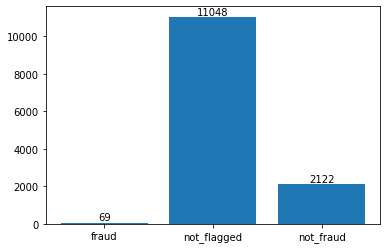

In [12]:
fig1 ,ax1 = plt.subplots()
bar = ax1.bar(flag_df["isflagged"], flag_df["count"], label=flag_df["count"])
ax1.bar_label(bar)
plt.show()


## data attributes of fraud flagged data

In [13]:
fraud_only = fraud_df[fraud_df.fraud_flag == 1]
len(fraud_only) #should be 69

69

In [14]:
no_fraud = fraud_df[fraud_df.fraud_flag == 0]
len(no_fraud) #should be 2122

2122

In [15]:
fraud_only.describe()

,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,time_diff,count
count,69.0,69.000000,69.000000,69.000000,69.000000,69.0,69.0,6.900000e+01,69.000000,69,69.0
mean,1.0,8445.913043,7.275362,8420.347826,106.652174,0.0,0.0,5.500574e+06,40.942029,0 days 00:01:14.724637681,1.0
std,0.0,2483.161260,1.877765,545.482378,56.073436,0.0,0.0,2.702598e+06,15.876253,0 days 00:00:38.462313127,0.0
min,1.0,2117.000000,6.000000,6186.000000,9.000000,0.0,0.0,1.063816e+06,16.000000,0 days 00:00:18,1.0
25%,1.0,8164.000000,6.000000,8250.000000,55.000000,0.0,0.0,3.668113e+06,28.000000,0 days 00:00:46,1.0
50%,1.0,9749.000000,6.000000,8500.000000,120.000000,0.0,0.0,5.658128e+06,38.000000,0 days 00:01:08,1.0
75%,1.0,9786.000000,10.000000,8800.000000,151.000000,0.0,0.0,7.958173e+06,50.000000,0 days 00:01:37,1.0
max,1.0,10109.000000,10.000000,9200.000000,199.000000,0.0,0.0,9.638140e+06,69.000000,0 days 00:02:44,1.0


In [16]:
fraud_only["same_email_flg"] = (fraud_only["hashed_consumer_email"] == fraud_only["hashed_buyer_email"]) #51/69
fraud_only["same_domain_flg"] = (fraud_only["consumer_email_domain"] == fraud_only["buyer_email_domain"]) # 68 /69 true
fraud_only["same_phone_flg"] = (
    fraud_only["hashed_consumer_phone"] == fraud_only["hashed_buyer_phone"])  # 20/69 true
fraud_only["same_phone_flg"].sum()


20

### vizualization (barcharts/histograms)

In [17]:
def bar_viz(df,col):
    fig, ax = plt.subplots()
    bar = ax.bar(df[col], df["count"], label=df["count"])
    ax.bar_label(bar)
    plt.show()


#### version

In [18]:
version = fraud_only.groupby("version").sum().reset_index()
version

,version,fraud_flag,payment_id,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
0,6.0,47.0,389554,402950,5006,0,0,257527436,1938,47,29,46,0
1,10.0,22.0,193214,178054,2353,0,0,122012196,887,22,22,22,20


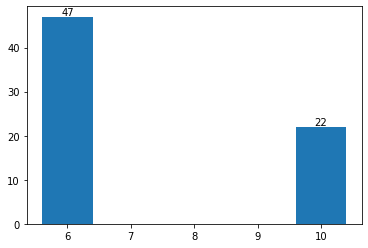

In [19]:
bar_viz(version,"version")


#### customer

In [20]:
customer = fraud_only.groupby("hashed_consumer_id").sum().reset_index()
customer # no fraud belongs to same user 

,hashed_consumer_id,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
0,consumer_1470,1.0,10091,6.0,8600,187,0,0,7088895,45,1,0,1,0
1,consumer_1530,1.0,9766,6.0,8500,166,0,0,5752309,27,1,1,1,0
2,consumer_1531,1.0,9765,6.0,8600,179,0,0,5752309,62,1,0,1,0
3,consumer_1589,1.0,8164,10.0,7980,17,0,0,6528114,68,1,1,1,1
4,consumer_1597,1.0,9704,6.0,9000,91,0,0,9050336,64,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,consumer_3469,1.0,9756,10.0,7980,155,0,0,4928897,41,1,1,1,1
65,consumer_3476,1.0,9757,10.0,8980,127,0,0,8229210,27,1,1,1,1
66,consumer_3542,1.0,9745,10.0,7264,171,0,0,6240194,47,1,1,1,1
67,consumer_3550,1.0,9746,10.0,8900,188,0,0,1103892,36,1,1,1,1


#### ip

In [21]:
ip = fraud_only.groupby("hashed_ip").sum().reset_index().sort_values("fraud_flag",ascending = False)
ip  # no fraud belongs to same user


,hashed_ip,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
20,ip_6106,6.0,58497,36.0,50950,595,0,0,21503006,181,6,3,6,0
21,ip_6108,5.0,48780,50.0,42900,567,0,0,34545424,168,5,5,5,5
35,ip_6285,3.0,30258,30.0,26940,287,0,0,16240602,135,3,3,3,3
1,ip_1401,3.0,6375,18.0,25900,124,0,0,23874519,128,3,1,3,0
12,ip_5162,3.0,24498,30.0,22176,376,0,0,12170574,129,3,3,3,3
0,ip_1398,2.0,4235,12.0,16900,256,0,0,8938052,134,2,1,2,0
15,ip_5184,2.0,16433,12.0,17050,220,0,0,2351378,54,2,1,2,0
36,ip_6287,2.0,20183,12.0,17000,296,0,0,14177790,71,2,1,2,0
28,ip_6119,2.0,19577,12.0,16800,173,0,0,12477906,114,2,1,2,0
26,ip_6117,2.0,19571,12.0,16850,29,0,0,7336226,90,2,1,2,0


#### time lapse

In [22]:

fraud_only[['time_diff', 'adjusted_acc_created_at',
            'adjusted_pmt_created_at']].head()


,time_diff,adjusted_acc_created_at,adjusted_pmt_created_at
488,0 days 00:00:53,2021-04-26 15:13:30,2021-04-26 15:12:37
605,0 days 00:00:29,2021-04-26 17:28:52,2021-04-26 17:28:23
619,0 days 00:00:57,2021-04-26 17:51:47,2021-04-26 17:50:50
648,0 days 00:02:12,2021-04-26 18:10:42,2021-04-26 18:08:30
665,0 days 00:00:29,2021-04-26 18:29:31,2021-04-26 18:29:02


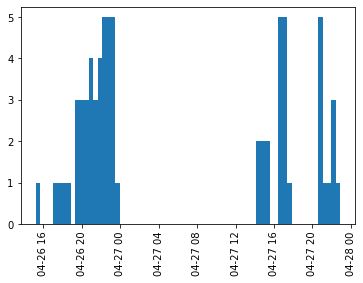

In [23]:
plt.hist(fraud_only['adjusted_acc_created_at'],bins=69)
plt.xticks(rotation=90)
plt.show()


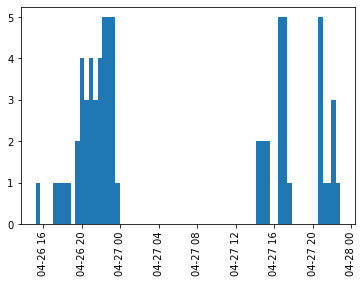

In [24]:
plt.hist(fraud_only['adjusted_pmt_created_at'],bins=69)
plt.xticks(rotation=90)
plt.show()


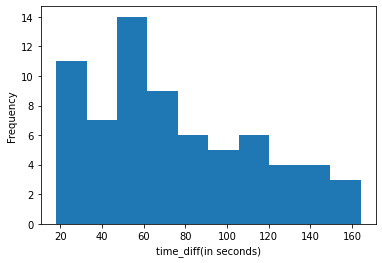

In [25]:
fraud_only['time_diff'].astype('timedelta64[s]').plot.hist()
plt.xlabel("time_diff(in seconds)")
plt.show()

#### email domain

In [26]:
email_domain = fraud_only.groupby("consumer_email_domain").sum().reset_index()
email_domain


,consumer_email_domain,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
0,gomen-da.com,10.0,92769,100.0,81240,1302,0,0,54060084,380,10,10,10,10
1,protonmail.ch,6.0,28077,36.0,51500,529,0,0,44949795,218,6,4,6,0
2,protonmail.com,40.0,353290,240.0,342650,4446,0,0,202939501,1703,40,25,40,0
3,yahoo.co.jp,13.0,108632,126.0,105614,1082,0,0,77590252,524,13,12,12,10


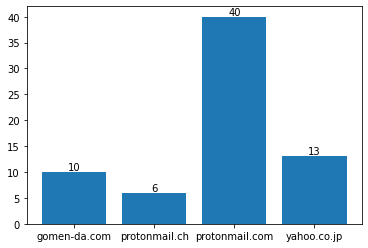

In [27]:
bar_viz(email_domain, "consumer_email_domain")


#### money spent

In [28]:
fraud_only.columns

Index(['fraud_flag', 'payment_id', 'hashed_ip', 'device', 'version',
       'adjusted_pmt_created_at', 'merchant_name', 'hashed_consumer_id',
       'adjusted_acc_created_at', 'amount', 'hashed_buyer_email',
       'buyer_email_domain', 'hashed_consumer_email', 'consumer_email_domain',
       'hashed_buyer_phone', 'hashed_consumer_phone', 'consumer_phone_age',
       'merchant_account_age', 'ltv', 'hashed_zip', 'consumer_gender',
       'consumer_age', 'time_diff', 'isflagged', 'count', 'same_email_flg',
       'same_domain_flg', 'same_phone_flg'],
      dtype='object')

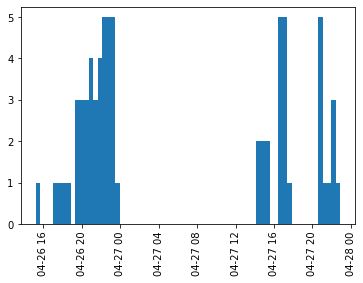

In [29]:
plt.hist(fraud_only['adjusted_acc_created_at'], bins=69)
plt.xticks(rotation=90)
plt.show()


## data attributes of not-fraud flagged data

In [30]:
no_fraud.describe()

,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,time_diff,count
count,2122.0,2122.000000,2113.000000,2122.000000,2122.000000,2122.000000,2122.000000,2.122000e+03,2122.000000,2122,2122.0
mean,0.0,6485.641376,11.801230,13235.106032,100.944392,188.979736,3681.077757,5.256192e+06,42.914232,-67 days +22:42:28.899151732,1.0
std,0.0,3899.849846,1.954806,17803.051536,57.229545,366.566693,12516.884573,2.748968e+06,15.978333,173 days 07:40:53.065444056,0.0
min,0.0,10.000000,4.000000,100.000000,1.000000,0.000000,0.000000,1.000891e+06,16.000000,-1416 days +22:46:25,1.0
25%,0.0,3130.750000,10.000000,2850.000000,53.000000,0.000000,0.000000,3.149753e+06,30.000000,-24 days +08:33:07,1.0
50%,0.0,6476.500000,13.000000,5972.500000,99.000000,0.000000,0.000000,5.398293e+06,43.000000,-1 days +21:53:45.500000,1.0
75%,0.0,9875.250000,13.000000,16390.000000,150.750000,192.000000,1980.000000,7.478093e+06,57.000000,0 days 00:00:11,1.0
max,0.0,13238.000000,13.000000,165000.000000,200.000000,2527.000000,250000.000000,9.998101e+06,70.000000,0 days 00:03:49,1.0


In [31]:
no_fraud["same_email_flg"] = (no_fraud["hashed_consumer_email"] == no_fraud["hashed_buyer_email"])  # 1906/2122
no_fraud["same_domain_flg"] = (no_fraud["consumer_email_domain"] == no_fraud["buyer_email_domain"])  # 1946/2122 true
no_fraud["same_phone_flg"] = (no_fraud["hashed_consumer_phone"] == no_fraud["hashed_buyer_phone"])  # 1973/2122 true
no_fraud["same_phone_flg"].sum()


1973

In [32]:
ip2 = no_fraud.groupby("hashed_ip").sum().reset_index().sort_values("count", ascending=False)
ip2


,hashed_ip,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
556,ip_3833,0.0,90000,195.0,52200,1734,0,0,128984220,717,15,15,15,15
1226,ip_7589,0.0,159000,169.0,169440,1385,0,0,55485534,525,13,13,13,13
623,ip_4188,0.0,79038,156.0,279575,1172,0,0,58297992,510,12,9,9,12
200,ip_197,0.0,3378,108.0,369899,1037,0,0,82914156,549,12,12,12,12
1203,ip_7458,0.0,131813,132.0,418000,741,0,0,79188417,494,11,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,ip_3697,0.0,5795,13.0,100000,184,0,0,8498194,49,1,1,1,1
532,ip_3692,0.0,5785,13.0,1500,164,73,1560,7788125,29,1,1,1,1
530,ip_3685,0.0,5776,13.0,29800,191,232,1000,5868945,22,1,0,1,1
528,ip_3669,0.0,5758,13.0,2820,179,0,0,3748908,34,1,1,1,1


### vizualization (barcharts/histograms)

#### version

In [33]:
no_version = no_fraud.groupby("version").sum().reset_index()
no_version

,version,fraud_flag,payment_id,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
0,4.0,0.0,38788,135690,411,6,1080,29442753,139,4,4,4,4
1,5.0,0.0,30916,22990,872,602,5310,26641194,291,6,6,6,4
2,6.0,0.0,141504,109510,1632,3192,70350,88723119,644,15,14,14,11
3,7.0,0.0,384527,846233,6218,8057,364540,307855725,2263,55,53,53,52
4,8.0,0.0,596384,1277224,8535,17841,199742,418295013,3452,81,75,78,77
5,9.0,0.0,1623847,3582530,27135,44162,1388433,1396457234,12717,281,255,263,264
6,10.0,0.0,696374,2089928,10563,25293,545601,626233867,4534,104,92,98,89
7,11.0,0.0,126208,290818,3099,5778,61080,161120735,1137,27,22,22,23
8,12.0,0.0,827128,1270659,11555,20337,211893,639578243,4920,119,107,108,108
9,13.0,0.0,9240887,18343423,143429,274913,4961968,7419935086,60608,1421,1269,1291,1333


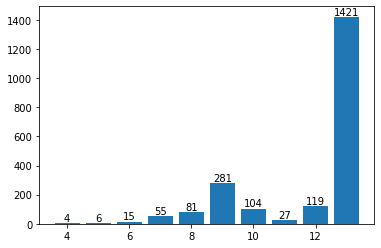

In [34]:
bar_viz(no_version,"version")


#### time lapse

In [35]:
no_fraud[['time_diff', 'adjusted_acc_created_at',
            'adjusted_pmt_created_at']].head()


,time_diff,adjusted_acc_created_at,adjusted_pmt_created_at
0,-32 days +23:15:16,2021-03-25 23:15:19,2021-04-26 00:00:03
1,-8 days +03:21:47,2021-04-18 03:23:20,2021-04-26 00:01:33
2,-48 days +23:42:17,2021-03-09 23:46:45,2021-04-26 00:04:28
3,-48 days +23:41:25,2021-03-09 23:46:45,2021-04-26 00:05:20
4,-6 days +19:31:54,2021-04-20 19:37:42,2021-04-26 00:05:48


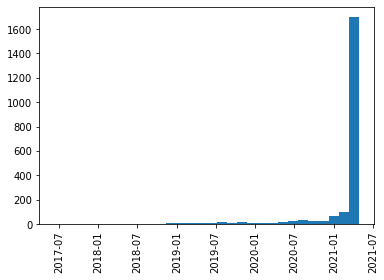

In [36]:
plt.hist(no_fraud['adjusted_acc_created_at'],bins=30)
plt.xticks(rotation=90)
plt.show()

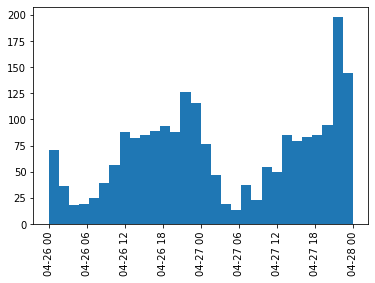

In [37]:
plt.hist(no_fraud['adjusted_pmt_created_at'],bins=30)
plt.xticks(rotation=90)
plt.show()

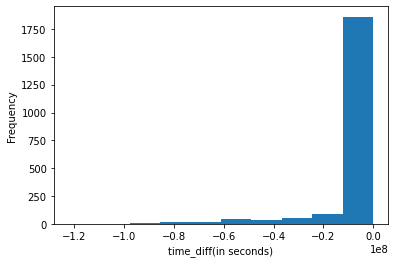

In [38]:
no_fraud['time_diff'].astype('timedelta64[s]').plot.hist()
plt.xlabel("time_diff(in seconds)")
plt.show()

#### email domain

In [39]:
no_email_domain = no_fraud.groupby("consumer_email_domain").sum().reset_index()
no_email_domain


,consumer_email_domain,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count,same_email_flg,same_domain_flg,same_phone_flg
0,163.com,0.0,7193,9.0,42750,56,62,250000,4228166,19,1,0,0,1
1,9tailfox.sakura.ne.jp,0.0,3548,9.0,5500,135,597,36000,4438096,68,1,1,1,0
2,actv.ne.jp,0.0,6607,13.0,2945,124,188,1110,2918114,58,1,1,1,1
3,ai.tnc.ne.jp,0.0,10962,10.0,6210,35,0,0,6928129,35,1,1,1,1
4,au.com,0.0,389678,1212.0,1353439,11166,9138,118480,630533198,4613,108,94,98,101
5,coral-co.com,0.0,9596,10.0,3530,172,0,0,4448154,37,1,1,1,0
6,d.vodafone.ne.jp,0.0,12413,12.0,2000,23,505,500,3379001,19,1,1,1,0
7,dg.rmail.ne.jp,0.0,11087,16.0,15780,239,250,600,18576386,116,2,2,2,0
8,docomo.ne.jp,0.0,1705506,2329.0,2374208,21012,52784,762192,1167953440,8894,209,199,203,195
9,dune.ocn.ne.jp,0.0,10889,10.0,6160,194,0,0,4688114,30,1,1,1,0


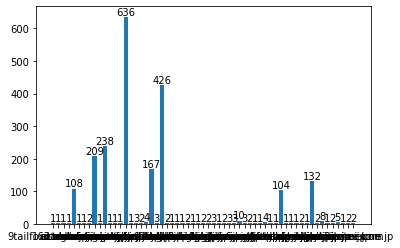

In [40]:
bar_viz(no_email_domain, "consumer_email_domain")


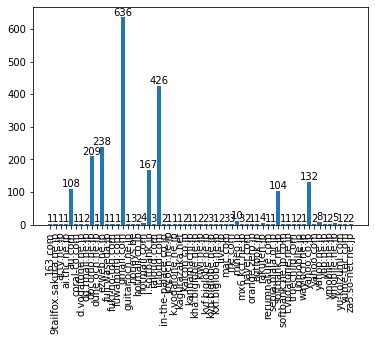

In [41]:
fig, ax = plt.subplots()
bar = ax.bar(no_email_domain["consumer_email_domain"],
             no_email_domain["count"], label=no_email_domain["count"])
ax.bar_label(bar)
plt.xticks(rotation=90)
plt.show()


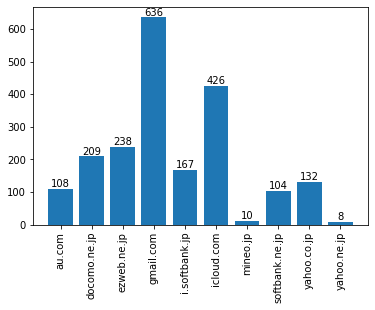

In [42]:
no_email_domain = no_email_domain[no_email_domain["count"]>5]
fig, ax = plt.subplots()
bar = ax.bar(no_email_domain["consumer_email_domain"],
             no_email_domain["count"], label=no_email_domain["count"])
ax.bar_label(bar)
plt.xticks(rotation=90)
plt.show()
